# Importamos librerias requeridas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from preprocessing.data_preprocessing import data_tokens, label_cat

[nltk_data] Downloading package stopwords to /home/raul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Leer dataset

In [2]:
#Cargando el dataset
df = pd.read_csv('data/youtoxic_english_1000.csv')

In [3]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


# EDA

### Cuantos son discurso de odio

<AxesSubplot: xlabel='IsToxic', ylabel='count'>

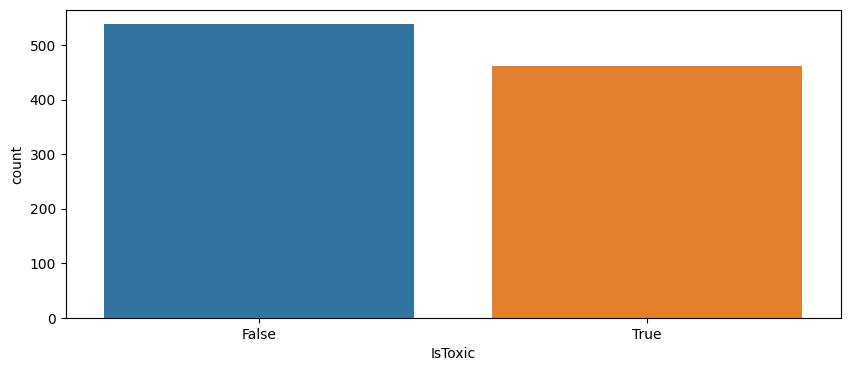

In [5]:
plt.figure(figsize=(10,4))
sns.countplot(x="IsToxic", data=df)

In [6]:

#text length

df['text length'] = df['Text'].apply(len)

In [7]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,text length
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,1558
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,138
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,False,False,False,False,421
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,582
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,243


<AxesSubplot: ylabel='Frequency'>

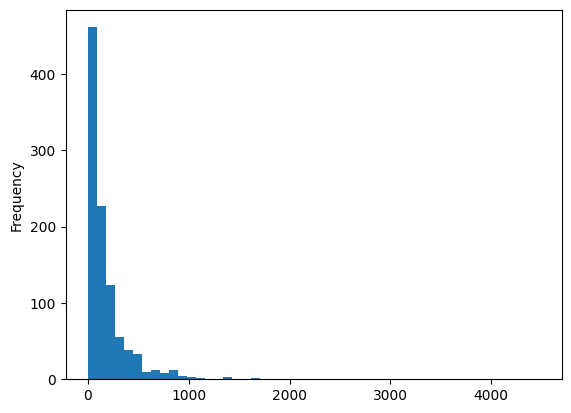

In [8]:
df['text length'].plot(bins=50, kind='hist')

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

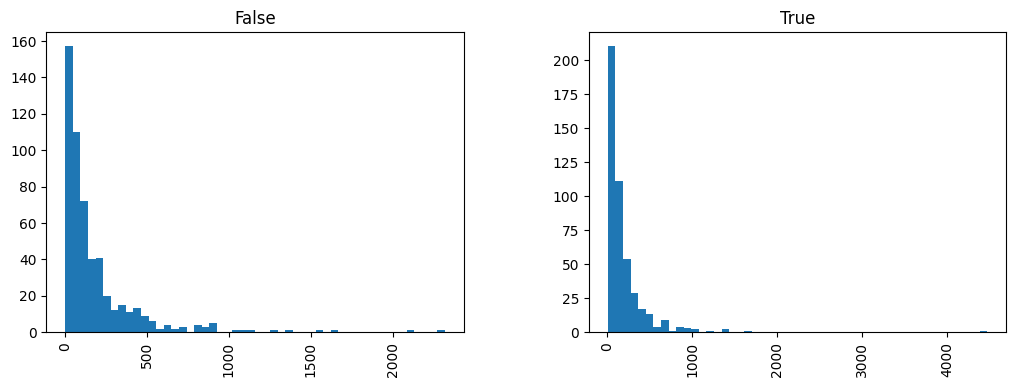

In [9]:
df.hist(column='text length',by='IsToxic',bins=50,figsize=(12,4))

## Preprocesamiento de los datos: tokens

In [10]:
## Text Pre-processing
import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

lemmatize=nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
# string proccessing
import re
import string

[nltk_data] Downloading package stopwords to /home/raul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/raul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/raul/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Palabras y caracteres más repetidos de la columna comentarios del dataset

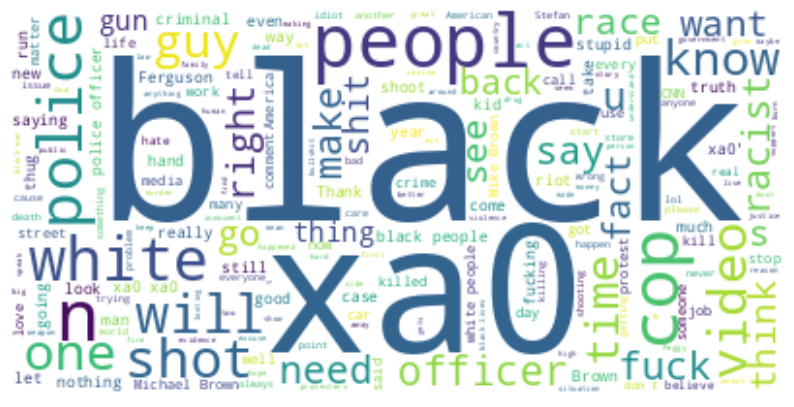

In [11]:
text = df['Text'].values 

wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
'''
#Borra espacios xa0
df['Text'] = df['Text'].replace(u'\xa0', u' ')
#Borra espacios en blanco
df['Text'] = df['Text'].str.strip()
'''

"\n#Borra espacios xa0\ndf['Text'] = df['Text'].replace(u'\xa0', u' ')\n#Borra espacios en blanco\ndf['Text'] = df['Text'].str.strip()\n"

In [13]:
'''
def text_process(text):
    corpus=[]
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    # Comprobar los caracteres para ver si están en la puntuación
    review = [char for char in review if char not in string.punctuation]
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    #review = [ps.stem(word) for word in review if not word in set(lemmas)]
    #review = ' '.join(review)
    #corpus.append(review)
    return review
'''

"\ndef text_process(text):\n    corpus=[]\n    review = re.sub('[^a-zA-Z]', ' ', text)\n    review = review.lower()\n    review = review.split()\n    # Comprobar los caracteres para ver si están en la puntuación\n    review = [char for char in review if char not in string.punctuation]\n    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]\n    #review = [ps.stem(word) for word in review if not word in set(lemmas)]\n    #review = ' '.join(review)\n    #corpus.append(review)\n    return review\n"

In [14]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,text length
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False,1558
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False,138
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,False,False,False,False,421
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False,582
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False,243


## Procesado y limpieza del texto. Salida en tokens para formar el corpus

In [15]:
df['Text'].head(5).apply(data_tokens)

0    [peopl, would, take, step, back, not, make, ca...
1    [law, enforc, not, train, shoot, apprehend, tr...
2    [dont, reckon, black, live, matter, banner, he...
3    [larg, number, peopl, not, like, polic, offic,...
4    [arab, dude, absolut, right, not, shot, extra,...
Name: Text, dtype: object

### Tokens mas repetidos, una vez limpiado y procesado

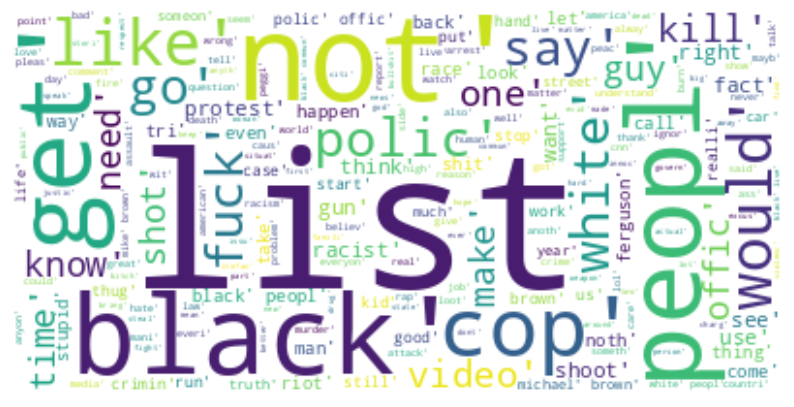

In [16]:
text = df['Text'].apply(data_tokens).values

wordcloud = WordCloud(background_color="white").generate(str(text))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Procesamiento: Vectorización de los tokens (después del procesado y limpieza del texto)

### Importamos las librerias necesarias para vectorizar

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.utils import shuffle  # para mezclar los registros del dataframe

### Mezcla aleatoria de los registros del dataframe

In [18]:
## Hipotesis: mezclamos el df por sesgos humanos a la hora de insertar registros o comentarios que son
## sugestionados por el sig o ant comentario
df = shuffle(df, random_state = 42)
df

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,text length
521,UgjxVU0ok82_bXgCoAEC,9pr1oE34bIM,You call yourself an anarchist but defend a co...,False,False,False,False,False,False,False,False,False,False,False,False,525
737,Uggma-nkAiK-eXgCoAEC,dG7mZQvaQDk,My mother told me the same thing. God Bless t...,False,False,False,False,False,False,False,False,False,False,False,False,56
740,UggQG0KuU_-llXgCoAEC,dG7mZQvaQDk,Love it I same the saem thing Go Peggy! #stup...,False,False,False,False,False,False,False,False,False,False,False,False,117
660,Ugy2Wc3ZRDsMcDYmoKF4AaABAg,cT14IbTDW2c,"Next time they do that, line up some cars and ...",True,True,False,True,False,False,False,False,False,False,False,False,173
411,Ugigl4XGkNFMMHgCoAEC,9pr1oE34bIM,He was Robbing the Store and Being a Big Man ....,False,False,False,False,False,False,False,False,False,False,False,False,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,UgiPerbilaHyd3gCoAEC,04kJtp6pVXI,I think that this indecent is unessacerry for ...,False,False,False,False,False,False,False,False,False,False,False,False,156
270,UggdxGw2fbcT0XgCoAEC,9pr1oE34bIM,you are clearly a racists shrill a canadian v...,True,True,False,False,False,False,False,False,False,False,False,False,148
860,Ugx3he2JevffnBpSued4AaABAg,Dt9-byUhPdg,"and what do the people see here,i can't even u...",True,False,False,False,False,True,True,False,False,False,False,False,203
435,UgiQjn-ai72EUXgCoAEC,9pr1oE34bIM,This is so far off base that you can't even ca...,True,True,False,True,False,False,False,False,False,False,False,False,67


### Vector entrenado. Ajuste

In [19]:

bow_transformer = CountVectorizer(analyzer=data_tokens).fit(df['Text'])

# Numero de tokens del vocuabulario
print(len(bow_transformer.vocabulary_))

3292


### Vectorizacion: hacemos pruebas

In [20]:
df4 = df['Text'][3]
print(df4)

There are a very large number of people who do not like police officers. They are called Criminals and its the reason we have police officers. The fact that Criminals do not like police officers is a testament to the good work that police officers do in protecting the public. When our children or our family are in danger, we do not hessitate to call for help, and we call the Police. Its about time people stopped complaining and started to give the Police some respect for the hard work and dedication that often requires them to put their lives on the line, to serve the public.


### Escalado

In [21]:
df4 = bow_transformer.transform([df4])
print(df4)
print(df4.shape)

  (0, 398)	3
  (0, 460)	1
  (0, 545)	1
  (0, 649)	2
  (0, 681)	1
  (0, 714)	1
  (0, 1014)	1
  (0, 1027)	1
  (0, 1214)	1
  (0, 1231)	1
  (0, 1301)	1
  (0, 1331)	1
  (0, 1339)	1
  (0, 1633)	1
  (0, 1679)	2
  (0, 1682)	1
  (0, 1692)	1
  (0, 1990)	3
  (0, 2002)	1
  (0, 2018)	4
  (0, 2020)	1
  (0, 2113)	2
  (0, 2171)	6
  (0, 2263)	1
  (0, 2277)	2
  (0, 2299)	1
  (0, 2361)	1
  (0, 2411)	1
  (0, 2418)	1
  (0, 2565)	1
  (0, 2742)	1
  (0, 2774)	1
  (0, 2894)	1
  (0, 2951)	1
  (0, 3234)	2
(1, 3292)


In [22]:
print(bow_transformer.get_feature_names_out()[183])
print(bow_transformer.get_feature_names_out()[699])

attitud
dealt


In [23]:
messages_bow = bow_transformer.transform(df['Text'])

In [24]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (1000, 3292)
Amount of Non-Zero occurences:  15132


In [25]:

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [26]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(df4)
print(tfidf4)

  (0, 3234)	0.20413867778913655
  (0, 2951)	0.08509330849036668
  (0, 2894)	0.1657639361427111
  (0, 2774)	0.09812142811568762
  (0, 2742)	0.09936351276225375
  (0, 2565)	0.12276308108273981
  (0, 2418)	0.11660026059469933
  (0, 2411)	0.14471401674399728
  (0, 2361)	0.10683943177070411
  (0, 2299)	0.10206933889456828
  (0, 2277)	0.24212120173889695
  (0, 2263)	0.13121081138632515
  (0, 2171)	0.4202595683544021
  (0, 2113)	0.12452533930904107
  (0, 2020)	0.14984028683067538
  (0, 2018)	0.3264041789459731
  (0, 2002)	0.12460189979646458
  (0, 1990)	0.19275013166262955
  (0, 1692)	0.09047818884904629
  (0, 1682)	0.1339166375186397
  (0, 1679)	0.14044408054099378
  (0, 1633)	0.14984028683067538
  (0, 1339)	0.1657639361427111
  (0, 1331)	0.12460189979646458
  (0, 1301)	0.11947562970978647
  (0, 1231)	0.09475351091652703
  (0, 1214)	0.10965597122522867
  (0, 1027)	0.11404507742772332
  (0, 1014)	0.09423724267557564
  (0, 714)	0.1657639361427111
  (0, 681)	0.13121081138632515
  (0, 649)	0.207

In [27]:
print(bow_transformer.vocabulary_)

{'call': 398, 'anarchist': 105, 'defend': 724, 'cop': 602, 'shoot': 2592, 'unarm': 3043, 'civilian': 485, 'highli': 1344, 'disappoint': 787, 'begin': 257, 'video': 3128, 'refer': 2373, 'squar': 2731, 'know': 1616, 'blunt': 319, 'much': 1903, 'wors': 3238, 'stefan': 2756, 'incred': 1467, 'touch': 2974, 'evid': 974, 'complet': 546, 'ignor': 1428, 'toward': 2976, 'black': 292, 'hip': 1350, 'hop': 1386, 'cultur': 663, 'slang': 2641, 'start': 2742, 'smoke': 2662, 'listen': 1688, 'would': 3245, 'like': 1679, 'gain': 1174, 'enlighten': 934, 'understand': 3055, 'life': 1675, 'lower': 1728, 'class': 490, 'america': 95, 'mother': 1888, 'told': 2961, 'thing': 2921, 'god': 1224, 'bless': 304, 'woman': 3228, 'love': 1726, 'saem': 2483, 'go': 1222, 'peggi': 2107, 'stupid': 2801, 'ya': 3264, 'kill': 1602, 'selv': 2551, 'quicker': 2308, 'stlpd': 2769, 'could': 614, 'ever': 967, 'wakeup': 3149, 'next': 1962, 'time': 2951, 'line': 1682, 'car': 412, 'make': 1749, 'burnout': 383, 'riot': 2443, 'ga': 1173,

In [28]:

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['b']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['black']])

6.29931686688112
2.8273504143307573


In [29]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1000, 3292)


In [30]:
from sklearn.linear_model import LogisticRegression
spam_detect_model = LogisticRegression().fit(messages_tfidf, df['IsToxic'])

In [31]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.IsToxic[3])

predicted: False
expected: False


In [32]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[False False False  True  True False  True False  True False False False
  True False  True False False False False False  True  True False  True
 False  True  True  True  True  True  True  True  True False False False
  True  True False  True  True  True False  True False  True False  True
 False  True  True False  True  True  True  True  True  True  True False
  True  True False  True  True  True  True False  True False  True False
  True  True  True False  True  True False  True  True  True False  True
 False  True False  True False False False False False  True False  True
 False  True  True False False False  True False  True  True  True  True
  True  True  True  True False False  True False False False False False
 False False  True False False False  True False  True False  True  True
 False False  True False  True  True  True  True  True False False False
  True False False  True  True  True  True  True False False  True  True
  True False  True False False  True False False  T

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print (classification_report(df['IsToxic'], all_predictions))

              precision    recall  f1-score   support

       False       0.91      0.96      0.93       538
        True       0.94      0.89      0.92       462

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [34]:
# No funciona de otra manera si no convierto de bool a int64
df['IsToxic']=label_cat(df['IsToxic'])

/home/raul/FactoriaF5/p4_nlp/app/preprocessing/data_preprocessing.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label==False] = 0


# Entrenar modelo

In [35]:
# Para dividir train y test nuestro datos
from sklearn.model_selection import train_test_split

#Usamos tuberias
from sklearn.pipeline import Pipeline

#Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
X_train, X_test, y_train, y_test = \
train_test_split(df['Text'], df['IsToxic'], test_size=0.2)

print(len(X_train), len(X_test), len(X_train) + len(X_test))

800 200 1000


### Creamos una tuberia con el modelo de Multinomial

In [37]:
pipeline = Pipeline([
    ('bow', TfidfVectorizer(analyzer=data_tokens)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [38]:
cv = TfidfVectorizer(analyzer=data_tokens).fit(df['Text'])

In [39]:
print(len(cv.vocabulary_))

3292


### Convertimos a csv el vocabulario de tokens para un mejor análisis

In [40]:
import csv

with open('dict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in cv.vocabulary_.items():
       writer.writerow([key, value])

### Creamos una tuberia con el modelo de CatBoosting

In [41]:
from catboost import CatBoostClassifier

pipeline_CBT = Pipeline([
    ('bow', TfidfVectorizer(analyzer=data_tokens)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier_cat', CatBoostClassifier(iterations=1000, learning_rate=0.001, loss_function='Logloss', eval_metric='AUC')),  # train on TF-IDF vectors w/ CatBoost classifier. Use_best_model params will make the model prevent overfitting
])

### Entrenamos con pipeline

In [42]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function data_tokens at 0x7fcf7cb1f0a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [43]:
#print(X_train)
#print(y_train)

#print(y_test)print(X_test)

In [44]:
pipeline_CBT.fit(X_train, y_train, classifier_cat__early_stopping_rounds=10, classifier_cat__verbose=False)

Pipeline(steps=[('bow',
                 TfidfVectorizer(analyzer=<function data_tokens at 0x7fcf7cb1f0a0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier_cat',
                 <catboost.core.CatBoostClassifier object at 0x7fcf7a6532e0>)])

### Predecimos

In [46]:
y_pred_logReg = pipeline.predict(X_test)

In [47]:
y_pred_CBT = pipeline_CBT.predict(X_test)


In [48]:
print(y_pred_CBT.astype)

<built-in method astype of numpy.ndarray object at 0x7fcf7a537810>


In [49]:
# Accuracy del modelo
acc = accuracy_score(y_test, y_pred_logReg)
# Overfitting
y_pred_train = pipeline.predict(X_train)
acc_train= accuracy_score(y_train, y_pred_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logReg)

print("++++Logistic Regression model+++")
print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")

print(classification_report(y_test, y_pred_logReg))
print(cm)

++++Logistic Regression model+++
Accuaracy: 0.66
Accuaracy_train: 0.965
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       106
           1       0.70      0.48      0.57        94

    accuracy                           0.66       200
   macro avg       0.67      0.65      0.64       200
weighted avg       0.67      0.66      0.65       200

[[87 19]
 [49 45]]


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy del modelo
acc = accuracy_score(y_test, y_pred_CBT)
# Overfitting
pred_train = pipeline_CBT.predict(X_train)
y_pred_train = pred_train.astype(dtype=bool)
acc_train= accuracy_score(y_train, y_pred_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_CBT)

print("++++CatBoost model+++")
print(f"Accuaracy: {acc}")
print(f"Accuaracy_train: {acc_train}")

print(classification_report(y_test, y_pred_CBT))
print(cm)

++++CatBoost model+++
Accuaracy: 0.675
Accuaracy_train: 0.7025
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       106
           1       0.84      0.38      0.53        94

    accuracy                           0.68       200
   macro avg       0.73      0.66      0.64       200
weighted avg       0.73      0.68      0.65       200

[[99  7]
 [58 36]]


# Guardamos nuestro Bow y nuestro mejor modelo

In [51]:
import pickle

In [52]:
#bow_transformer = TfidfVectorizer(analyzer=data_tokens).fit_transform(df['Text']).toarray()
vector_train = TfidfVectorizer(analyzer=data_tokens).fit(df['Text'])
#bow_vector = TfidfTransformer().fit_transform(cv).toarray()

In [ ]:
### Guardando diccionario BoW para usarlo mas tarde en la predicción
bow_path = 'BoW_HateSpeech_Model.pkl'
pickle.dump(vector_train, open(bow_path, "wb"))

In [ ]:
pickle.dump(pipeline_CBT, open('cat_model_less_data_trained', 'wb'))